In [490]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [450]:
import numpy as np
import pandas as pd
df=pd.read_csv("drive/My Drive/ysa final/data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [451]:
#label sütunu çıktı olarak y dizisine aktarılmıştır.
#n ve label sütunları ana datadan çıkartılıp x_data'ya aktarılmıştır.

print(df.diagnosis.unique())
df.diagnosis=[0 if each =='M' else 1 for each in df.diagnosis]
y=df.diagnosis.values
x_data=df.drop(["id","diagnosis","Unnamed: 32"],axis=1)

['M' 'B']


In [452]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)) #data set normalize edildi.
print(df.diagnosis.unique())

[0 1]


In [453]:
#veri seti eğitim ve test verilerine bölünür.
from sklearn.model_selection import train_test_split
#y=[0 if each =='M' else 1 for each in y]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (455, 30)
y_train: (455,)
x_test: (114, 30)
y_test: (114,)


In [454]:
print(x_data[x_data.isnull()])

     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0            NaN           NaN  ...             NaN                      NaN
1            NaN           NaN  ...             NaN                      NaN
2            NaN           NaN  ...             NaN                      NaN
3            NaN           NaN  ...             NaN                      NaN
4            NaN           NaN  ...             NaN                      NaN
..           ...           ...  ...             ...                      ...
564          NaN           NaN  ...             NaN                      NaN
565          NaN           NaN  ...             NaN                      NaN
566          NaN           NaN  ...             NaN                      NaN
567          NaN           NaN  ...             NaN                      NaN
568          NaN           NaN  ...             NaN                      NaN

[569 rows x 30 columns]


In [455]:
#yapay sinir ağları mlp sınıflandırıcısı ile sınıflandırılır
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [456]:
print("mlpc score:",mlpc.score(x_test,y_test)) 

mlpc score: 0.956140350877193


In [458]:
#mlpc skoru 10,10-39,39 arası gizli katman boyutları ile hesaplanmış.
#en yüksek skor 25,25 gizli katman boyutunda bulunmuştur 0.9672131147540983.
mlpscore=[]
for i in range(10,39):
    mlpc_2=MLPClassifier(random_state=1,solver="lbfgs",activation="logistic",hidden_layer_sizes=(i,i))
    mlpc_2.fit(x_train,y_train)
    mlpscore.append(mlpc_2.score(x_test,y_test))
print("mlpc_2 score:",mlpscore)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

mlpc_2 score: [0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.7631578947368421, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [459]:
#K-fold cross validation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [460]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=knn,X=x,y=y,cv=10)

for score in scores:
    print(score)
    
print("ortalama skor:",np.mean(scores))

0.9649122807017544
0.9473684210526315
0.9298245614035088
0.9824561403508771
1.0
0.9824561403508771
0.9298245614035088
0.9824561403508771
0.9649122807017544
0.9821428571428571
ortalama skor: 0.9666353383458647


In [462]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))
try: x=x.to_numpy()
except:
    for train_indexler,test_indexler in kf.split(x):
        mlpc.fit(x[train_indexler],y[train_indexler])
        score=mlpc.score(x[test_indexler],y[test_indexler])
        scores.append(score)
        print(score)
    print("ortalama score:",np.mean(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9649122807017544
0.9298245614035088
0.9824561403508771
0.9122807017543859
0.9473684210526315
0.9649122807017544
0.7192982456140351
0.9473684210526315


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1.0
0.9642857142857143
ortalama score: 0.9332706766917293


In [463]:
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(activation="logistic",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 477 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [464]:
 print(mlpc_cv_model.best_params_)


{'alpha': 0.1, 'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}


In [466]:
mlpc_tuned=MLPClassifier(alpha=0.1,hidden_layer_sizes=(10,10),solver="lbfgs").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 0.9035087719298246


In [469]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

mlpc=MLPClassifier(alpha=0.1,hidden_layer_sizes=(100,100),solver="lbfgs",activation="logistic",max_iter=500).fit(x_train,y_train) 
y_pred=mlpc.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9736842105263158


In [470]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[40  2]
 [ 1 71]]


In [63]:
f1=metrics.f1_score(y_test,y_pred,average='micro')
print("f1 score:",f1)

f1 score: 0.9736842105263158


In [64]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [471]:
from sklearn import preprocessing
#y_test = preprocessing.label_binarize(y_test, classes=[0, 1, 2, 3])
#roc and auc
probs=mlpc.predict_proba(x_test)
#print(probs)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
auc_value=metrics.auc(fpr,tpr)

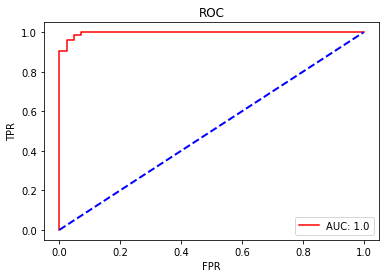

In [472]:
plt.title("ROC")
plt.plot(fpr,tpr,label="AUC: "+str(round(auc_value,2)),color="red")
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [473]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [474]:
y_pred=mlpc.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9736842105263158


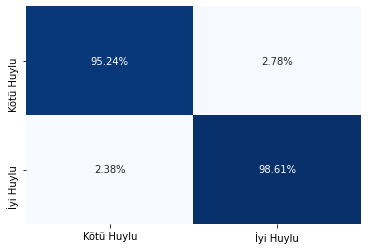

In [475]:
class_adlari=["Kötü Huylu","İyi Huylu"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")



In [476]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv1D,MaxPool1D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [477]:
X=x_data.to_numpy()

In [478]:
print(X.shape)
x=X.reshape(X.shape[0],X.shape[1],1)
print(x.shape)

(569, 30)
(569, 30, 1)


In [479]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [480]:
input_shape=x_train.shape[1:]
print(input_shape)

(30, 1)


In [484]:
model=Sequential()
model.add(Conv1D(15,kernel_size=3,activation="relu",padding="Same",input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Conv1D(30,kernel_size=3,activation="relu",padding="Same",input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Conv1D(45,kernel_size=3,activation="relu",padding="Same",input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation="softmax"))

In [485]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [486]:
model.summary()


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_71 (Conv1D)           (None, 30, 15)            60        
_________________________________________________________________
batch_normalization_71 (Batc (None, 30, 15)            60        
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 15, 15)            0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 15, 15)            0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 15, 30)            1380      
_________________________________________________________________
batch_normalization_72 (Batc (None, 15, 30)            120       
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 7, 30)           

In [487]:
#y_train = np.array(y_train)
#y_test = np.array(y_test)
#x_train = np.array(x_train)
#x_test = np.array(x_test)
print(x_test.shape)

print(y_test.shape)

(114, 30, 1)
(114,)


In [488]:
egitim=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
15/15 [==============================] - 1s 21ms/step - loss: 1.5061 - accuracy: 0.5741 - val_loss: 5.4967 - val_accuracy: 0.3684
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3439 - accuracy: 0.8819 - val_loss: 4.1334 - val_accuracy: 0.3684
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3081 - accuracy: 0.8801 - val_loss: 2.6816 - val_accuracy: 0.3772
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3172 - accuracy: 0.8741 - val_loss: 1.3209 - val_accuracy: 0.4825
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3062 - accuracy: 0.8576 - val_loss: 0.9279 - val_accuracy: 0.5175
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2229 - accuracy: 0.9278 - val_loss: 0.6002 - val_accuracy: 0.7018
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2769 - accuracy: 0.8751 - val_loss: 0.6151 - val_accuracy: 0.6930
Epoch 8/100


0.8914505559206009


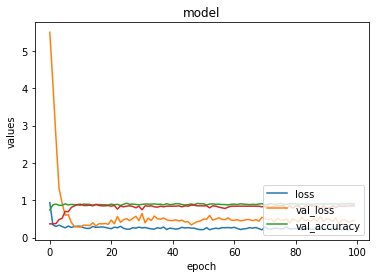

In [489]:
#print(egitim.history)
plt.plot(egitim.history["loss"])
plt.plot(egitim.history["val_loss"])
plt.plot(egitim.history["accuracy"])
plt.plot(egitim.history["val_accuracy"])
meanAcc=np.array(egitim.history["accuracy"]).mean()
print(meanAcc)
plt.title('model')
plt.ylabel('values')
plt.xlabel('epoch')
plt.legend(['loss','val_loss','val_accuracy'],loc='lower right')
plt.show()

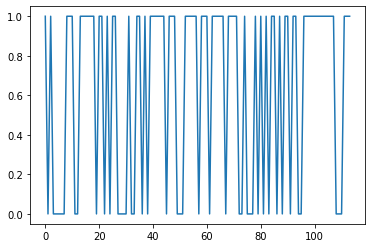

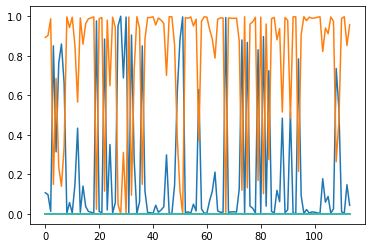

IndexError: ignored

In [447]:
import sklearn.metrics as metrics

y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred)
y_true=np.argmax(y_pred,axis=1)
#y_true=np.array(np.where(y_test==1))
print(y_true)
#ytk=y_true.reshape(-1,1)
#print(y_true.shape)
cm=metrics.confusion_matrix(y_true,y_pred_classes)
cr=metrics.classification_report(y_true,y_pred_classes)
print(cr)
acc=metrics.confusion_matrix(y_true,y_pred_classes)
print(acc)

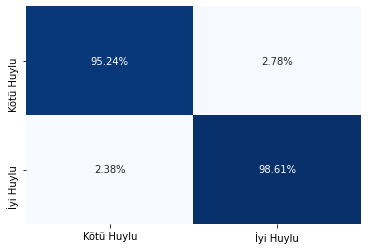

In [420]:
class_adlari=["Kötü Huylu","İyi Huylu"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

#sns.heatmap(cm/cm.sum(axis=1),annot=True, fmt='.2f', cmap='Blues', cbar=False, linecolor='gray',linewidths=0.01)